0.9485193621867881
0.9474394841248155


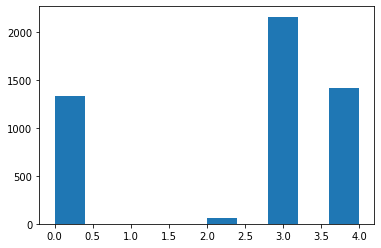

1334
0
56
2158
1411
 1) fun-rank                       0.194648
 2) fun-average                    0.134941
 3) theme-rank                     0.112234
 4) innovation-rank                0.111997
 5) ratings-received               0.075505
 6) mood-average                   0.060343
 7) graphics-rank                  0.058158
 8) mood-rank                      0.045795
 9) num-comments                   0.043272
10) graphics-average               0.041926
11) innovation-average             0.037831
12) humor-rank                     0.020273
13) theme-average                  0.017941
14) audio-rank                     0.016126
15) audio-average                  0.015946
16) humor-average                  0.007660
17) prev-games                     0.003331
18) category                       0.002073


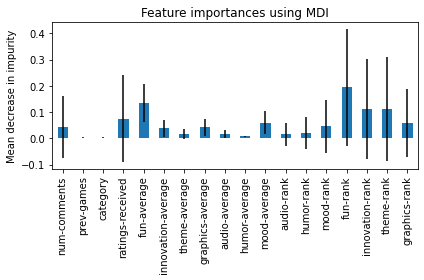

In [50]:
#RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

train = pd.read_csv("/kaggle/input/cs480-2022-fall/train.csv")
test = pd.read_csv("/kaggle/input/cs480-2022-fall/test.csv")
## important fields
mask = ["num-comments","prev-games","category",
       "ratings-received","fun-average",
       "innovation-average","theme-average","graphics-average","audio-average","humor-average",
       "mood-average","audio-rank","humor-rank","mood-rank","fun-rank","innovation-rank","theme-rank","graphics-rank"]
mask2 = ["fun-average","innovation-average","theme-average","graphics-average","audio-average","humor-average","mood-average"]
# data cleaning
train_y = train["label"].copy()
train_X = train[mask].copy()
for i in range(len(mask2)):
    train_X[mask2[i]] = [0 if j == -1 else j for j in train_X[mask2[i]]]
# data cleaning for test data
test_X = test[mask].copy()
for i in range(len(mask2)):
    test_X[mask2[i]] = [0 if j == -1 else j for j in test_X[mask2[i]]]
    
drop_features = []
train_X = train_X.drop(drop_features,axis=1)
test_X = test_X.drop(drop_features,axis=1)
validation_bound = np.rint(np.floor((4/5)*len(train_X))).astype(int)
valid_X = train_X[:][validation_bound:].copy()
train_X = train_X[:][0:validation_bound].copy()
valid_y = train_y[:][validation_bound:].copy()
train_y = train_y[:][0:validation_bound].copy()
train_X["category"] = [1 if i == "jam" else 0 for i in train_X["category"]]
valid_X["category"] = [1 if i == "jam" else 0 for i in valid_X["category"]]
test_X["category"] = [1 if i == "jam" else 0 for i in test_X["category"]]
eval_set = [(valid_X,valid_y)]
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_y)

rf_valid_pred = rf.predict(valid_X)
print(accuracy_score(valid_y,rf_valid_pred))
print(f1_score(valid_y,rf_valid_pred,average="weighted"))
# get predictions for testing data
rf_pred = rf.predict(test_X)
plt.hist(rf_pred)
plt.show()
for i in range(5):
    print(sum(rf_pred == i))

## find important features
feature_names = train_X.columns
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.show()
sorted_indices = np.argsort(importances)[::-1]
 
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feature_names[sorted_indices[f]],
                            importances[sorted_indices[f]]))

[0]	validation_0-merror:0.06173
[1]	validation_0-merror:0.05945


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-merror:0.05945
[3]	validation_0-merror:0.05877
[4]	validation_0-merror:0.05923
[5]	validation_0-merror:0.06128
[6]	validation_0-merror:0.06105
[7]	validation_0-merror:0.05968
[8]	validation_0-merror:0.05923
[9]	validation_0-merror:0.06128
[10]	validation_0-merror:0.06150
[11]	validation_0-merror:0.05991
[12]	validation_0-merror:0.05968
[13]	validation_0-merror:0.05923
[14]	validation_0-merror:0.05923
[15]	validation_0-merror:0.05968
[16]	validation_0-merror:0.05923
[17]	validation_0-merror:0.05877
[18]	validation_0-merror:0.05831
[19]	validation_0-merror:0.05854
[20]	validation_0-merror:0.05877
[21]	validation_0-merror:0.05854
[22]	validation_0-merror:0.05786
[23]	validation_0-merror:0.05809
[24]	validation_0-merror:0.05786
[25]	validation_0-merror:0.05718
[26]	validation_0-merror:0.05786
[27]	validation_0-merror:0.05831
[28]	validation_0-merror:0.05786
[29]	validation_0-merror:0.05786
[30]	validation_0-merror:0.05786
[31]	validation_0-merror:0.05740
[32]	validation_0-

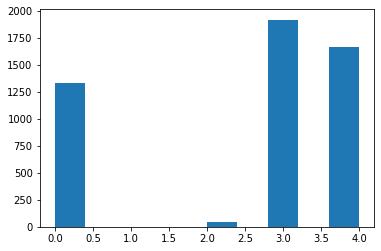

1335
0
45
1916
1663
 1) fun-rank                       0.730733
 2) theme-rank                     0.104813
 3) fun-average                    0.088245
 4) mood-average                   0.030844
 5) innovation-average             0.007764
 6) graphics-average               0.007372
 7) mood-rank                      0.004578
 8) audio-average                  0.004228
 9) graphics-rank                  0.003785
10) theme-average                  0.003269
11) innovation-rank                0.002811
12) ratings-received               0.002646
13) num-comments                   0.002562
14) humor-rank                     0.001763
15) audio-rank                     0.001731
16) humor-average                  0.001168
17) category                       0.001045
18) prev-games                     0.000643


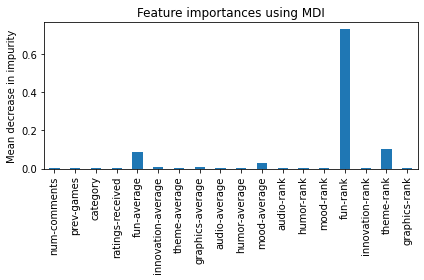

In [49]:
## xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
## read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
## important fields
mask = ["num-comments","prev-games",
       "ratings-received","fun-average",
       "innovation-average","theme-average","graphics-average","audio-average","humor-average",
       "mood-average","audio-rank","humor-rank","mood-rank","fun-rank","innovation-rank","theme-rank","graphics-rank"]
mask2 = ["fun-average","innovation-average","theme-average","graphics-average","audio-average","humor-average","mood-average"]
# data cleaning
train_y = train["label"]
train_X = train[mask].copy()
for i in range(len(mask2)):
    train_X[mask2[i]] = [0 if j == -1 else j for j in train_X[mask2[i]]]
# data cleaning for test data
test_X = test[mask].copy()
for i in range(len(mask2)):
    test_X[mask2[i]] = [0 if j == -1 else j for j in test_X[mask2[i]]]
    
drop_features = []
xgbc = XGBClassifier(eta=0.01)
train_X = train_X.drop(drop_features,axis=1)
test_X = test_X.drop(drop_features,axis=1)
validation_bound = np.rint(np.floor((4/5)*len(train_X))).astype(int)
valid_X = train_X[:][validation_bound:].copy()
train_X = train_X[:][0:validation_bound]
valid_y = train_y[:][validation_bound:].copy()
train_y = train_y[:][0:validation_bound]
eval_set = [(valid_X,valid_y)]


xgbc.fit(train_X, train_y,early_stopping_rounds=20, eval_metric="mlogloss", eval_set=eval_set, verbose=True)
xgbc_predictions = xgbc.predict(test_X,iteration_range=(0,xgbc.best_iteration + 1))
values, bins, bars = plt.hist(xgbc_predictions,bins=6,range=(0,5))
plt.xlabel("Label")
plt.ylabel("Counts")
plt.title("Prediction Distribution for XGBoost")
plt.bar_label(bars, fontsize=10, color='navy')
plt.show()
for i in range(5):
    print(sum(xgbc_predictions == i))
xgbc_importances = xgbc.feature_importances_
xgbc_feature_names = train_X.columns
boost_importances = pd.Series(xgbc_importances, index=xgbc_feature_names)
fig, ax = plt.subplots()
boost_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
si = np.argsort(xgbc_importances)[::-1]
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,xgbc_feature_names[si[f]],xgbc_importances[si[f]]))

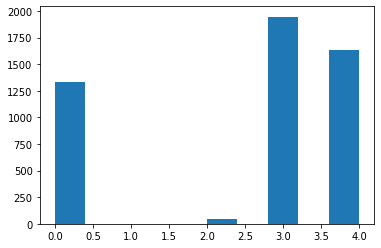

1334
0
44
1946
1635
 1) fun-rank                       21.911481
 2) fun-average                    17.325691
 3) theme-rank                     14.885959
 4) innovation-rank                12.255612
 5) ratings-received               8.122180
 6) mood-average                   4.968893
 7) graphics-average               3.844158
 8) description                    3.462742
 9) innovation-average             3.304898
10) graphics-rank                  2.731937
11) theme-average                  1.974814
12) mood-rank                      1.517748
13) audio-average                  1.257469
14) num-comments                   1.120370
15) audio-rank                     0.761648
16) humor-rank                     0.366606
17) humor-average                  0.086930
18) category                       0.083059
19) prev-games                     0.017804
1076.2944366931915


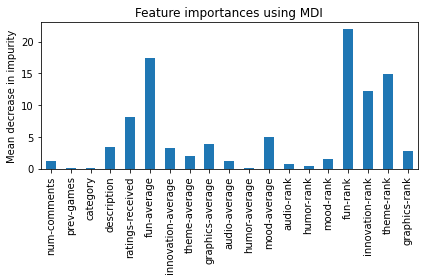

In [83]:
## Catboost Ver 2
from catboost import CatBoostClassifier
from itertools import chain
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# read in data
train = pd.read_csv("/kaggle/input/cs480-2022-fall/train.csv")
test = pd.read_csv("/kaggle/input/cs480-2022-fall/test.csv")

## important fields
mask = ["num-comments","category","description",
       "ratings-received","fun-average",
       "innovation-average","theme-average","graphics-average","audio-average","humor-average",
       "mood-average","audio-rank","humor-rank","mood-rank","fun-rank","innovation-rank","theme-rank","graphics-rank"]
mask2 = ["fun-average","innovation-average","theme-average","graphics-average","audio-average","humor-average","mood-average"]

# data cleaning
train_y = train["label"].copy() # get labels for training data
train_X = train[mask].copy() # train_X with selected features 
for i in range(len(mask2)):
    train_X[mask2[i]] = [0 if j == -1 else j for j in train_X[mask2[i]]]
# data cleaning for test data
test_X = test[mask].copy()
for i in range(len(mask2)):
    test_X[mask2[i]] = [0 if j == -1 else j for j in test_X[mask2[i]]]
    
# split training data: 20% as validation data
validation_bound = np.rint(np.floor((4/5)*len(train_X))).astype(int)
valid_X = train_X[:][validation_bound:].copy()
train_X = train_X[:][0:validation_bound].copy()
valid_y = train_y[:][validation_bound:].copy()
train_y = train_y[:][0:validation_bound].copy()

# data cleaning: description = Nan -> description = ""
train_X = train_X.fillna("")
test_X = test_X.fillna("")
valid_X = valid_X.fillna("")
eval_set = [(valid_X,valid_y)]

# model init
clf = CatBoostClassifier(learning_rate=0.01)
# train the model
clf.fit(train_X, train_y,early_stopping_rounds=10, eval_set=eval_set,
        silent=True,cat_features=["category"],text_features=["description"],
        use_best_model=True)
# get predictions
clf_predictions = clf.predict(test_X,verbose=True)
clf_predictions = list(chain.from_iterable(clf_predictions))
clf_predictions = np.array(clf_predictions)

# save it as a csv file including a header
pd.DataFrame({"id":test["id"],"label":clf_predictions}).to_csv("/kaggle/working/submission.csv",index=None)

# 2 plots for CatBoostClassifier
## prediction distribution and feature importance 
"""
plt.hist(clf_predictions)
plt.show()
for i in range(5):
    print(sum(clf_predictions == i))
clf_importances = clf.feature_importances_
clf_feature_names = train_X.columns
boost_importances1 = pd.Series(clf_importances, index=clf_feature_names)
fig, ax = plt.subplots()
boost_importances1.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
si = np.argsort(clf_importances)[::-1]
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,clf_feature_names[si[f]],clf_importances[si[f]]))
"""

0.9464692482915718
0.9454706461925312


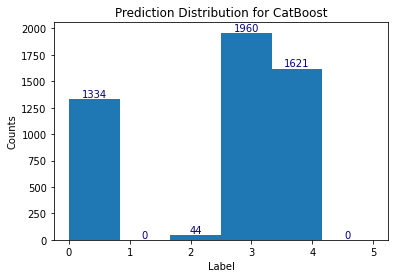

1334
0
44
1960
1621
 1) fun-average                    20.247328
 2) fun-rank                       17.697898
 3) theme-rank                     12.704385
 4) innovation-rank                10.902046
 5) ratings-received               8.698096
 6) mood-average                   6.445067
 7) graphics-average               5.077350
 8) innovation-average             4.160990
 9) graphics-rank                  2.751648
10) mood-rank                      2.461226
11) num-comments                   2.265141
12) theme-average                  1.917756
13) audio-average                  1.556968
14) audio-rank                     1.276484
15) humor-rank                     1.164100
16) humor-average                  0.673519


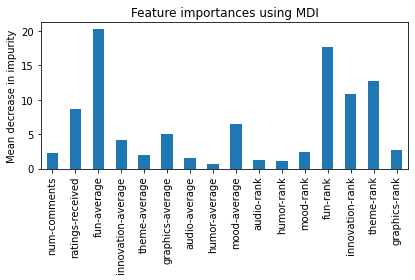

In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from itertools import chain
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
# read in data 
train = pd.read_csv("/kaggle/input/cs480-2022-fall/train.csv")
test = pd.read_csv("/kaggle/input/cs480-2022-fall/test.csv")
## important fields
mask = ["num-comments","ratings-received","fun-average",
       "innovation-average","theme-average","graphics-average","audio-average",
        "humor-average","mood-average","audio-rank","humor-rank","mood-rank",
        "fun-rank","innovation-rank","theme-rank","graphics-rank"]

# data cleaning
train_y = train["label"].copy()
train_X = train[mask].copy()
# data cleaning for test data
test_X = test[mask].copy()
    

# split training data: 20% as validation data
validation_bound = np.rint(np.floor((4/5)*len(train_X))).astype(int)
valid_X = train_X[:][validation_bound:].copy()
train_X = train_X[:][0:validation_bound].copy()
valid_y = train_y[:][validation_bound:].copy()
train_y = train_y[:][0:validation_bound].copy()
eval_set = [(valid_X,valid_y)]


# model init 
clf = CatBoostClassifier(learning_rate=0.01)
# train model
clf.fit(train_X, train_y,early_stopping_rounds=10, eval_set=eval_set,use_best_model=True,silent=True)
# get predictions on test set
clf_predictions = clf.predict(test_X)
clf_predictions = list(chain.from_iterable(clf_predictions))
clf_predictions = np.array(clf_predictions)

# save it as a csv file including a header
pd.DataFrame({"id":test["id"],"label":clf_predictions}).to_csv("/kaggle/working/submission.csv",index=None)

## get accuracy and F1 score 

"""
cld_valid_pred = clf.predict(valid_X)
print(accuracy_score(valid_y,cld_valid_pred))
print(f1_score(valid_y,cld_valid_pred,average="weighted"))
"""

# 2 plots for CatBoostClassifier
## prediction distribution and feature importance 

"""
values, bins, bars = plt.hist(clf_predictions,bins=6,range=(0,5))
plt.xlabel("Label")
plt.ylabel("Counts")
plt.title("Prediction Distribution for CatBoost")
plt.bar_label(bars, fontsize=10, color='navy')
plt.show()
for i in range(5):
    print(sum(clf_predictions == i))

clf_importances = clf.feature_importances_
clf_feature_names = train_X.columns
boost_importances1 = pd.Series(clf_importances, index=clf_feature_names)
fig, ax = plt.subplots()
boost_importances1.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
si = np.argsort(clf_importances)[::-1]
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,clf_feature_names[si[f]],clf_importances[si[f]]))
"""

In [3]:
my_sub = pd.read_csv("/kaggle/working/submission.csv")
for i in range(5):
    print(sum(my_sub["label"] == i))

1334
0
44
1960
1621
